# Tutorial on using pdblp

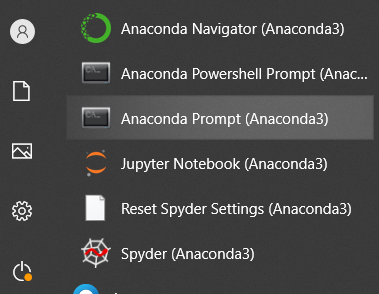

install Anaconda via portail d'entreprise,  open le Anaconda prompt and type then enter:

pip install pdblp

This tutorial provides some simple use cases for pdblp . To start with, import the library and create a BCon() object

In [ ]:
import pdblp

con = pdblp.BCon(debug=True, port=8194, timeout=5000)

Make sure that you are logged in to a Bloomberg terminal, after which you should be able to to start a connection as follows

In [ ]:
con.start()

To get some historical data, we can call bdh()

In [ ]:
con.bdh('SPY US Equity', 'PX_LAST',
                '20150629', '20150630')

Notice that when con.debug == True that the Response and Request messages are printed to stdout. This can be quite useful for debugging but gets annoying for normal use, so let’s turn it off and get some more data. This time we request two fields which returns a DataFrame with a MultiIndex by default.

In [ ]:
con.debug = False

con.bdh('SPY US Equity', ['PX_LAST', 'VOLUME'],
            '20150629', '20150630')

But can also return data in long format

In [ ]:
con.bdh('SPY US Equity', ['PX_LAST', 'VOLUME'],
       '20150629', '20150630', longdata=True)

You can also override different FLDS’s, for example

In [ ]:
con.bdh('MPMIEZMA Index', 'PX_LAST',
          '20150101', '20150830')

In [ ]:
con.bdh('MPMIEZMA Index', 'PX_LAST',
           '20150101', '20150830',
        ovrds=[('RELEASE_STAGE_OVERRIDE', 'P')])

The libary also contains functions for accessing reference data, a variety of usages are shown below

In [ ]:
con.ref('AUDUSD Curncy', 'SETTLE_DT')

In [ ]:
con.ref(['NZDUSD Curncy', 'AUDUSD Curncy'], 'SETTLE_DT')


In [ ]:
con.ref('AUDUSD Curncy', ['SETTLE_DT', 'DAYS_TO_MTY'])

In [ ]:
con.ref(['NZDUSD Curncy', 'AUDUSD Curncy'],
      ['SETTLE_DT', 'DAYS_TO_MTY'])

In [ ]:
con.ref('AUDUSD Curncy', 'SETTLE_DT',
       [('REFERENCE_DATE', '20150715')])

In [ ]:
con.bulkref('W 1 Comdty', 'FUT_CHAIN',
            [('INCLUDE_EXPIRED_CONTRACTS', 'Y')]).head()

In [ ]:
con.ref_hist('AUD1M Curncy', 'DAYS_TO_MTY',
           dates=['20150625', '20150626'])

In [ ]:
con.ref_hist(['AUD1M Curncy', 'NZD1M Curncy'],
              'DAYS_TO_MTY',
              dates=['20150625', '20150626'])

In [ ]:
on.bulkref_hist("BVIS0587 Index", "CURVE_TENOR_RATES",
                dates=['20160625'],
               date_field="CURVE_DATE").head()

In [ ]:
con.bsrch("COMDTY:VESSEL").head()